In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    ez = np.exp(z)
    return ez / (1+ez)

In [3]:
def d_sigmoid(z):
    return sigmoid(z) * (1-sigmoid(z))

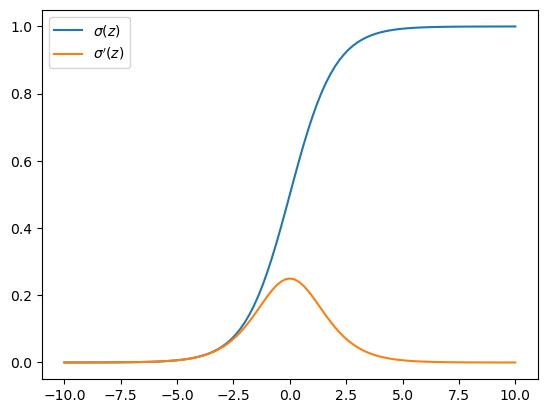

In [5]:
I = np.linspace(-10, 10, 101)
S = sigmoid(I)
DS = d_sigmoid(I)

plt.plot(I, S, label=r"$\sigma(z)$")
plt.plot(I, DS, label=r"$\sigma'(z)$")
plt.legend();

In [6]:
X = np.array([80, 90, 100, 110, 120, 150, 170])
Y = np.array([0, 0, 0, 1, 0, 1, 1])

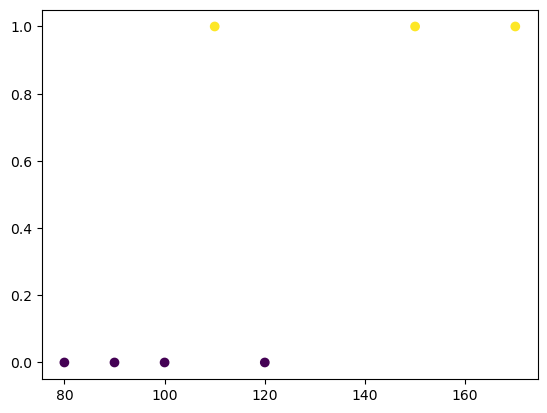

In [10]:
plt.scatter(X, Y, c=Y);

In [29]:
a = 0.2
b = -22

In [30]:
def predict(a, b, x):
    z = a * x + b
    return sigmoid(z)

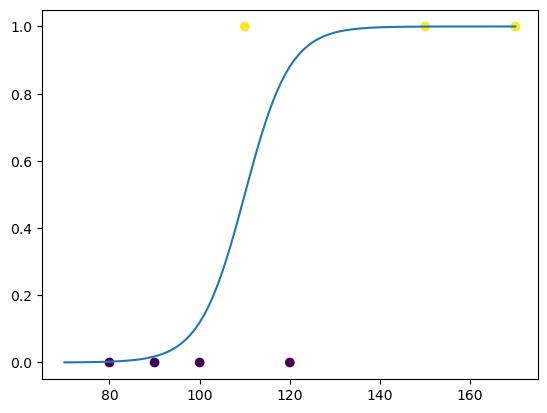

In [31]:
I = np.linspace(70, 170, 101)
J = predict(a, b, I)

plt.scatter(X, Y, c=Y);
plt.plot(I, J)

In [32]:
def loss_i(a, b, x, y):
    y_hat = predict(a, b, x)
    l = y * np.log(y_hat) + (1-y)*np.log(1-y_hat)
    return -l

In [33]:
def loss(a, b, X, Y):
    L = loss_i(a, b, X, Y)
    return np.sum(L)

In [34]:
loss_i(a, b, X, Y)

array([2.47568514e-03, 1.81499279e-02, 1.26928011e-01, 6.93147181e-01,
       2.12692801e+00, 3.35406373e-04, 6.14419348e-06])

In [35]:
loss(a, b, X, Y)

2.967970366267804

In [42]:
loss_vector = np.vectorize(lambda a, b: loss(a, b, X, Y))

In [50]:
A = np.linspace(a-0.2, a+0.2, 201)
B = np.linspace(b-5, b+5, 201)
AA, BB= np.meshgrid(A, B)

In [51]:
L = loss_vector(AA, BB)

/tmp/ipykernel_54528/757211022.py:3: RuntimeWarning: divide by zero encountered in log
  l = y * np.log(y_hat) + (1-y)*np.log(1-y_hat)
/tmp/ipykernel_54528/757211022.py:3: RuntimeWarning: invalid value encountered in multiply
  l = y * np.log(y_hat) + (1-y)*np.log(1-y_hat)


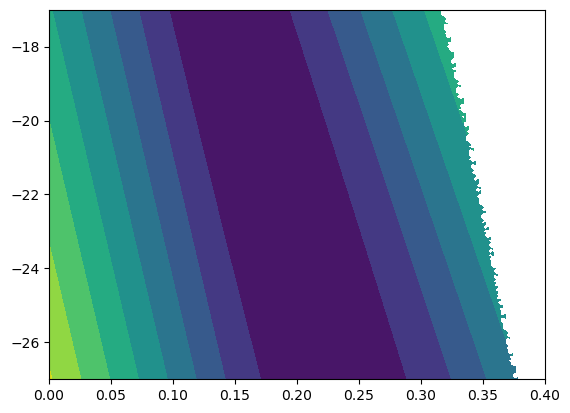

In [52]:
plt.contourf(AA, BB, L);

In [53]:
def gradient(a, b, X, Y):
    Y_hat = predict(a, b, X)
    dlZ = Y_hat - Y
    dA = dlZ * X
    dB = dlZ
    return dA.sum(), dB.sum()


In [56]:
gradient(0.25, -22, X, Y)

(280.3270010443838, 2.689830705410788)

In [66]:
def gradient_descent(a0, b0, X, Y, n, ratio):
    As = [a0]
    Bs = [b0]

    for i in range(n):
        a = As[-1]
        b = Bs[-1]
        da, db = gradient(a, b, X, Y)
        a_new = a - ratio * da
        b_new = b - ratio * db
        
        As.append(a_new)
        Bs.append(b_new)

    return As, Bs


In [86]:
As, Bs = gradient_descent(0.3, -20, X, Y, 20, 0.001)

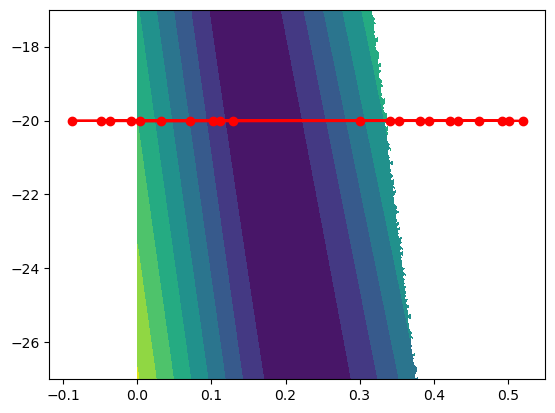

In [87]:
plt.contourf(AA, BB, L);
plt.plot(As, Bs, "o-", color="red")

In [80]:
As[-1], Bs[-1]

(0.17155478187760387, -20.001177898129267)

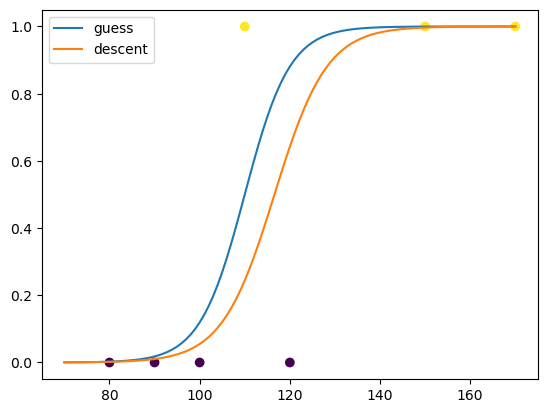

In [81]:
plt.scatter(X, Y, c=Y);

I = np.linspace(70, 170, 101)
J = predict(a, b, I)
plt.plot(I, J, label="guess")

I = np.linspace(70, 170, 101)
J = predict(As[-1], Bs[-1], I)
plt.plot(I, J, label="descent")

plt.legend();

In [83]:
Ls = [loss(a,b,X,Y) for a, b in zip(As, Bs)]

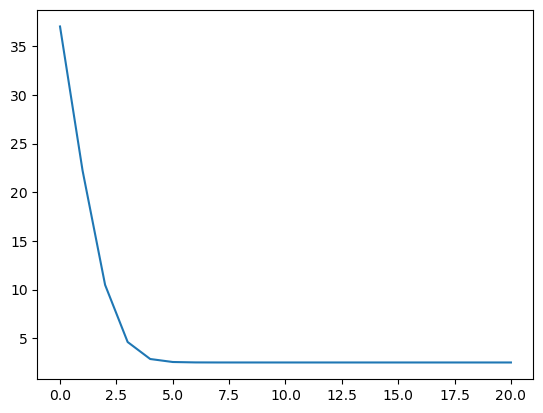

In [85]:
plt.plot(range(len(Ls)), Ls)